# Showing the position of cities in Iran on map with MDS and Isomap

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn import manifold

## Distances between cities

In [2]:
distances = pd.read_excel('distances.xlsx',index_col=0)
distances

,اراک,اردبیل,ارومیه,اصفهان,اهواز,ایلام,بجنورد,بندرعباس,بوشهر,بیرجند,...,قزوین,قم,کرج,کرمان,کرمانشاه,گرگان,مشهد,همدان,یاسوج,یزد
اراک,0,843,786,288,581,514,1006,1245,868,1606,...,303,134,281,949,365,690,1187,176,587,588
اردبیل,843,0,527,1030,1305,975,1080,1925,1610,1814,...,451,723,529,1629,791,764,1333,667,1329,1268
ارومیه,786,527,0,1074,1064,766,1620,2026,1549,2220,...,763,1039,709,1735,582,1303,1803,610,1373,1374
اصفهان,288,1030,1074,0,745,678,1152,975,580,1173,...,480,279,435,661,653,836,1222,464,299,300
اهواز,581,1305,1064,745,0,447,1587,1278,485,1918,...,882,715,787,1230,487,1271,1768,638,433,1081
ایلام,514,975,766,678,447,0,1423,1729,932,1788,...,617,648,673,1339,184,1107,1604,373,977,978
بجنورد,1006,1080,1620,1152,1587,1423,0,1627,1941,734,...,863,845,739,1142,1239,316,253,1050,1451,1390
بندرعباس,1245,1925,2026,975,1278,1729,1627,0,927,1213,...,1455,1142,1298,485,1769,1731,1374,1421,793,657
بوشهر,868,1610,1549,580,485,932,1941,927,0,1599,...,1060,876,1030,875,972,1625,1648,1044,281,726
بیرجند,1606,1814,2220,1173,1918,1788,734,1213,1599,0,...,1463,1445,1180,999,1800,1050,481,1637,1405,873


## Convert Dataframe to matrix

In [3]:
A=distances.to_numpy()
A

array([[   0,  843,  786,  288,  581,  514, 1006, 1245,  868, 1606,  785,
         293,  206,  577, 1478,  505,  560,  529,  340,  392,  773,  303,
         134,  281,  949,  365,  690, 1187,  176,  587,  588],
       [ 843,    0,  527, 1030, 1305,  975, 1080, 1925, 1610, 1814,  219,
         591,  930,  266, 2158,  377,  634,  828,  655, 1134, 1515,  451,
         723,  529, 1629,  791,  764, 1333,  667, 1329, 1268],
       [ 786,  527,    0, 1074, 1064,  766, 1620, 2026, 1549, 2220,  308,
         907,  783,  793, 2264,  588, 1174, 1143,  446, 1178, 1559,  763,
        1039,  709, 1735,  582, 1303, 1803,  610, 1373, 1374],
       [ 288, 1030, 1074,    0,  745,  678, 1152,  975,  580, 1173, 1038,
         439,  370,  764, 1190,  757,  706,  675,  627,  104,  445,  480,
         279,  435,  661,  653,  836, 1222,  464,  299,  300],
       [ 581, 1305, 1064,  745,    0,  447, 1587, 1278,  485, 1918, 1075,
         874,  375, 1039, 1759,  967, 1141, 1110,  623,  849,  659,  882,
        

In [4]:
A.shape

(31, 31)

## MDS

### function for calculate matrix B from matrix A

In [5]:
def Matrix_B(A):
    A_tilda=np.power(A, 2)
    I=np.identity(31)
    e=np.ones(31)
    eeT=np.outer(e,e.T)
    L=I-(1/31)*eeT
    B=(-1/2)*(L@A_tilda@L)
    return B

In [6]:
B=Matrix_B(A)
B

array([[ 4.60306743e+04,  2.03555130e+04,  2.21818336e+05,
         5.71580333e+03,  1.46416529e+05,  1.24829658e+05,
        -9.46700676e+04, -5.16427934e+04,  3.03362549e+04,
        -5.03426987e+05,  7.55042388e+04, -2.59583767e+02,
         8.18704807e+04,  8.32978720e+03, -1.64089342e+05,
         4.54344969e+04, -2.40716160e+04, -1.84267128e+04,
         1.09396126e+05,  1.52097711e+04,  1.53971098e+04,
         2.09844324e+04,  5.64930333e+03, -2.51223741e+04,
        -7.12704225e+04,  1.17161207e+05,  1.87414204e+03,
        -2.15489745e+05,  6.29686259e+04,  3.72501098e+04,
        -2.40629547e+04],
       [ 2.03555130e+04,  7.05329352e+05,  7.21501174e+05,
        -1.53612858e+05, -2.06666132e+05,  1.11264497e+05,
         1.57797271e+05, -7.99793455e+05, -5.59352406e+05,
        -5.29457648e+05,  6.89285578e+05,  1.97673755e+05,
         2.87819459e+02,  4.69065626e+05, -1.07068000e+06,
         4.31531836e+05,  2.61399723e+05,  1.08351126e+05,
         2.82332965e+05, -2.21

### function for get Eigenvalue Decompostion components

In [7]:
def EigenValue_Decomposition(B):
    eigen_values,Q=np.linalg.eig(B)
    idx = eigen_values.argsort()[::-1] 
    eigen_values = eigen_values[idx]
    Q = Q[:,idx]
    return eigen_values,Q

In [8]:
eigen_values,Q=EigenValue_Decomposition(B)

In [9]:
eigen_values

array([ 9.35623984e+06,  5.61904954e+06,  1.41912791e+06,  9.75518092e+05,
        7.02130122e+05,  5.15879310e+05,  4.81649796e+05,  3.23155374e+05,
        2.48099914e+05,  1.60935817e+05,  1.16380618e+05,  7.06175383e+04,
        3.19595778e+04,  1.57036574e+04,  5.41643161e+03,  2.74078362e-10,
       -2.87044657e+03, -7.51372319e+03, -1.94591892e+04, -4.62130955e+04,
       -4.86951243e+04, -9.98162149e+04, -1.63319506e+05, -1.78880307e+05,
       -2.52229524e+05, -3.75978066e+05, -4.09609104e+05, -4.83312660e+05,
       -5.49898853e+05, -8.06990974e+05, -1.31006866e+06])

In [10]:
Q

array([[-5.38518682e-02, -6.81014962e-02, -5.81847680e-02,
         8.03215096e-02,  3.51658592e-02, -1.80263785e-01,
         1.61957932e-01,  1.56268921e-01,  3.40409997e-01,
         5.37012073e-02, -9.21900410e-03,  2.40200091e-01,
        -1.08159220e-01, -6.66334834e-02,  1.86309834e-01,
         1.79605302e-01, -3.73316404e-01, -2.27287438e-01,
        -3.94704959e-01, -2.55169371e-01, -5.04249680e-03,
        -5.71655268e-02,  8.71366218e-02, -3.16297474e-01,
         1.15654017e-01,  5.96936287e-02,  1.55157944e-01,
        -9.61032685e-02, -1.74540727e-01,  1.87113582e-01,
         2.84888341e-03],
       [-2.37927377e-01,  1.49669762e-01, -5.30087063e-02,
        -2.74546203e-01,  1.75837078e-01,  3.72376008e-02,
        -1.52514433e-01, -1.10165177e-02,  1.37911736e-01,
         1.91016918e-01,  9.95596986e-02, -3.21485178e-01,
         1.04331253e-01, -1.44813544e-01,  6.23870645e-02,
         1.79605302e-01,  3.97547199e-03,  5.95180038e-02,
         1.87190593e-01,  7.76

### check that the docomposition is equal to B

In [11]:
ei_matrix=np.identity(len(eigen_values))
for i in range(len(eigen_values)):
    ei_matrix[i][i]=eigen_values[i]
Q@ei_matrix@Q.T

array([[ 4.60306743e+04,  2.03555130e+04,  2.21818336e+05,
         5.71580333e+03,  1.46416529e+05,  1.24829658e+05,
        -9.46700676e+04, -5.16427934e+04,  3.03362549e+04,
        -5.03426987e+05,  7.55042388e+04, -2.59583767e+02,
         8.18704807e+04,  8.32978720e+03, -1.64089342e+05,
         4.54344969e+04, -2.40716160e+04, -1.84267128e+04,
         1.09396126e+05,  1.52097711e+04,  1.53971098e+04,
         2.09844324e+04,  5.64930333e+03, -2.51223741e+04,
        -7.12704225e+04,  1.17161207e+05,  1.87414204e+03,
        -2.15489745e+05,  6.29686259e+04,  3.72501098e+04,
        -2.40629547e+04],
       [ 2.03555130e+04,  7.05329352e+05,  7.21501174e+05,
        -1.53612858e+05, -2.06666132e+05,  1.11264497e+05,
         1.57797271e+05, -7.99793455e+05, -5.59352406e+05,
        -5.29457648e+05,  6.89285578e+05,  1.97673755e+05,
         2.87819459e+02,  4.69065626e+05, -1.07068000e+06,
         4.31531836e+05,  2.61399723e+05,  1.08351126e+05,
         2.82332965e+05, -2.21

### function for get X (position of cities) with MDS

In [12]:
# k is 2
def MDS(A):
    B=Matrix_B(A)
    eigen_values,Q=EigenValue_Decomposition(B)
    landa1_hat=max(eigen_values[0],0)
    landa2_hat=max(eigen_values[1],0)
    l=[np.sqrt(landa1_hat),np.sqrt(landa2_hat)]
    l=np.array(l)
    landa_k=np.diag(l)
    Q_k=Q[:,:2]
    X=Q_k.dot(landa_k)
    return X

In [13]:
X=MDS(A)
X

array([[-164.72193966, -161.43142649],
       [-727.77157557,  354.78520388],
       [-945.19856213, -179.14186882],
       [ 147.28059309, -230.32217279],
       [-219.42053547, -719.020196  ],
       [-469.33350029, -343.89036415],
       [ 193.1004737 ,  962.51838829],
       [1038.56391923, -471.76439516],
       [ 331.59702545, -821.85733109],
       [1063.36128017,  691.11393586],
       [-805.07424304,  142.00239805],
       [-170.15084626,  181.74333773],
       [-195.48444497, -272.09424168],
       [-437.36152874,  309.95431186],
       [1359.99484668,  109.07067653],
       [-509.12500521,  146.60996857],
       [-140.87978675,  348.2234055 ],
       [-108.66867976,  304.08454291],
       [-494.91207652, -162.13129694],
       [ 155.21343371, -150.22169061],
       [ 498.13345782, -587.21367032],
       [-305.18444305,   96.84639737],
       [ -60.42032856,  -27.62221029],
       [-148.55371394,  139.38402783],
       [ 786.46603743, -176.81485981],
       [-504.68878236, -1

## list of cities

In [14]:
list(distances.columns)

['اراک',
 'اردبیل',
 'ارومیه',
 'اصفهان',
 'اهواز',
 'ایلام',
 'بجنورد',
 'بندرعباس',
 'بوشهر',
 'بیرجند',
 'تبریز',
 'تهران',
 'خرم آباد',
 'رشت',
 'زاهدان',
 'زنجان',
 'ساری',
 'سمنان',
 'سنندج',
 'شهرکرد',
 'شیراز',
 'قزوین',
 'قم',
 'کرج',
 'کرمان',
 'کرمانشاه',
 'گرگان',
 'مشهد',
 'همدان',
 'یاسوج',
 'یزد']

## this is because persian labels will be messed up in plot

In [15]:
cities=[]
for city in list(distances.columns):
    cities.append(get_display(arabic_reshaper.reshape(city)))

## function for show cities on map

In [43]:
def show_map(X,ravesh,k):
    plt.scatter(X[:,0], X[:,1],marker='s',c='green')
    plt.xlabel("X")
    plt.ylabel("Y")
    if ravesh=='MDS' and k==None:
        plt.title("cities with MDS",fontsize=15)
    if ravesh=='Isomap':
        plt.title("cities with Isomap(knn, k=%s)" %k ,fontsize=15)
    for i, label in enumerate(cities):
        plt.annotate(label, (X[:,0][i], X[:,1][i]))
    plt.show()

## cities with MDS

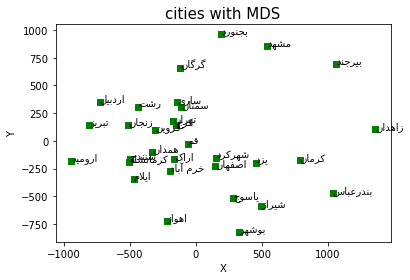

In [44]:
show_map(X,'MDS',k=None)

## Isomap

### neighborhood graph with knn

In [81]:
def knn_gragh(A,k):
    G=np.zeros((31,31))
    count=-1
    for listi in A:
        listi2=listi
        count+=1
        index_mini=count
        for i in range(k):
            listi2[index_mini]=1e8
            mini=min(listi2)
            index_mini=np.argmin(listi2)
            G[count][index_mini]=mini
            G[index_mini][count]=mini
    return G

### knn with k=3

In [82]:
distances = pd.read_excel('distances.xlsx',index_col=0)
A=distances.to_numpy()
G_3=knn_gragh(A,3)
G_3

array([[  0.,   0.,   0., 288.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        134.,   0.,   0.,   0.,   0.,   0., 176.,   0.,   0.],
       [  0.,   0., 527.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 219.,
          0.,   0., 266.,   0., 377.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 527.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 308.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 446.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [288.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 104.,   0.,   0.,
        279.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.],
       [  0.,   0.,   0.,   0.,   0., 447.,   0.,   0.,   0.,   0.,   0.,
          0., 375.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        

### function for calculate minimum distances

In [83]:
def min_distance(n,dist, sptSet):
    minimum = 1e8
    for v in range(n):
        if dist[v] < minimum and sptSet[v] == False:
            minimum = dist[v]
            min_index = v
    return min_index

### function for dijkstra algorithm

In [84]:
def dijkstra(n,G,src):
    dist = [1e8] * n
    dist[src] = 0
    sptSet = [False] * n
 
    for c in range(n):
        u = min_distance(n,dist, sptSet)

        sptSet[u] = True
        for v in range(n):
            if (G[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + G[u][v]):
                dist[v] = dist[u] + G[u][v]
    return dist

In [85]:
#when the source node is 0
np.array(dijkstra(31,G_3,0))

array([   0.,  847.,  786.,  288.,  581.,  514.,  648., 1245.,  902.,
       1382.,  859.,  266.,  206.,  581., 1478.,  579.,  533.,  502.,
        340.,  392.,  795.,  404.,  134.,  301.,  949.,  365.,  663.,
        901.,  176.,  621.,  588.])

In [86]:
#when the source node is 1
np.array(dijkstra(31,G_3,1))

array([ 847.,    0.,  527.,  992., 1422.,  975., 1306., 1949., 1276.,
       2040.,  219.,  593., 1053.,  266., 2182.,  377.,  860.,  812.,
        655., 1096., 1499.,  451.,  713.,  546., 1653.,  791.,  990.,
       1559.,  819., 1325., 1292.])

### distances between any two nodes with dijkstra (Geodesic distances)

In [87]:
M_3=[]
for i in range(31):
    M_3.append(np.array(dijkstra(31,G_3,i)))
M_3=np.array(M_3)
M_3

array([[   0.,  847.,  786.,  288.,  581.,  514.,  648., 1245.,  902.,
        1382.,  859.,  266.,  206.,  581., 1478.,  579.,  533.,  502.,
         340.,  392.,  795.,  404.,  134.,  301.,  949.,  365.,  663.,
         901.,  176.,  621.,  588.],
       [ 847.,    0.,  527.,  992., 1422.,  975., 1306., 1949., 1276.,
        2040.,  219.,  593., 1053.,  266., 2182.,  377.,  860.,  812.,
         655., 1096., 1499.,  451.,  713.,  546., 1653.,  791.,  990.,
        1559.,  819., 1325., 1292.],
       [ 786.,  527.,    0., 1074., 1213.,  766., 1434., 2031., 1596.,
        2168.,  308.,  913.,  873.,  793., 2264.,  588., 1180., 1132.,
         446., 1178., 1581.,  763.,  920.,  866., 1735.,  582., 1310.,
        1687.,  610., 1407., 1374.],
       [ 288.,  992., 1074.,    0.,  766.,  802.,  360.,  957.,  614.,
        1094., 1004.,  411.,  494.,  726., 1190.,  724.,  678.,  647.,
         628.,  104.,  507.,  549.,  279.,  446.,  661.,  653.,  676.,
         613.,  464.,  333.,  300.],


In [88]:
M_3.shape

(31, 31)

###  function for get X (position of cities) with Isomap

In [89]:
def Isomap(A,k):
    G_k=knn_gragh(A,k)
    M_k=[]
    for i in range(31):
        M_k.append(np.array(dijkstra(31,G_k,i)))
    M_k=np.array(M_k)
    B=Matrix_B(M_k)
    eigen_values,Q=EigenValue_Decomposition(B)
    landa1_hat=max(eigen_values[0],0)
    landa2_hat=max(eigen_values[1],0)
    if(2<=k<=4):
        l=[np.sqrt(landa1_hat),-1*np.sqrt(landa2_hat)]
    if(5<=k<=6 or 10<=k<=12):
        l=[-1*np.sqrt(landa1_hat),-1*np.sqrt(landa2_hat)]
    if(7<=k<=9):
        l=[np.sqrt(landa1_hat),np.sqrt(landa2_hat)]
    if(k>=13):
        l=[-1*np.sqrt(landa1_hat),np.sqrt(landa2_hat)]
    l=np.array(l)
    landa_k=np.diag(l)
    Q_k=Q[:,:2]
    X=Q_k.dot(landa_k)
    return X

In [90]:
distances = pd.read_excel('distances.xlsx',index_col=0)
A=distances.to_numpy()
X_3=Isomap(A,3)
X_3

array([[-111.58359661,   90.22094193],
       [-808.44072394, -220.10269804],
       [-925.5738394 ,  130.56009045],
       [ 178.0204778 ,   58.47082254],
       [ -78.5924597 ,  581.82826801],
       [-503.69210008,  434.53271448],
       [ 363.90526045, -301.98798883],
       [ 992.99059475,  622.9678855 ],
       [ 241.50242799,  106.45367193],
       [1123.41349449, -593.22472221],
       [-845.18468299, -152.50162787],
       [-203.25971202, -123.97333557],
       [-227.89745362,  213.30830968],
       [-501.77574882, -201.57121883],
       [1348.11958044, -112.88373422],
       [-558.71738654,  -92.12010763],
       [-112.50772126, -504.34092322],
       [-174.42350759, -272.39017605],
       [-465.07429732,  168.39524849],
       [ 228.0337215 ,   19.59177526],
       [ 464.38630489,  370.8619553 ],
       [-357.33133412, -136.61036295],
       [-110.73767383,   -6.87504733],
       [-243.85659623, -128.50957884],
       [ 751.91925356,  292.24902481],
       [-456.66468146,  2

## cities with Isomap (knn,k=3)

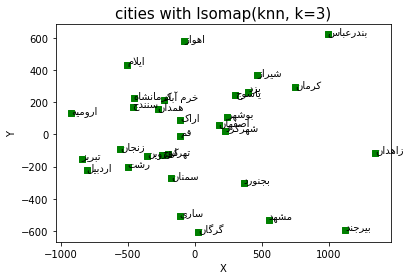

In [91]:
show_map(X_3,'Isomap',k=3)

### knn with k=7

In [92]:
distances = pd.read_excel('distances.xlsx',index_col=0)
A=distances.to_numpy()
X_7=Isomap(A,7)
X_7

array([[-148.81387805,  -83.34766362],
       [-688.77350672,  322.55086043],
       [-949.61224299,  -63.84053503],
       [ 161.23594813,  -81.9104078 ],
       [-109.48186815, -561.07030842],
       [-452.15647513, -367.41820413],
       [ 312.47410079,  338.08086752],
       [ 959.91906594, -535.7798462 ],
       [ 213.84617791, -207.70598705],
       [1054.55927545,  646.21345213],
       [-805.42785354,   56.16277331],
       [-180.02989712,   94.70729069],
       [-171.40836669, -216.63048584],
       [-427.11818397,  252.77989644],
       [1314.11023613,   32.23685254],
       [-510.39893736,   48.35516291],
       [-130.37519936,  379.1403189 ],
       [ -99.76824708,  314.90386027],
       [-503.86489255, -169.51054596],
       [ 204.83559952,  -30.48329363],
       [ 472.19982389, -348.80161052],
       [-322.94297123,   78.01811956],
       [ -86.02532437,  -29.06926276],
       [-220.84258631,   90.95221251],
       [ 741.17935641, -288.52504709],
       [-501.43646232, -2

## cities with Isomap (knn,k=7)

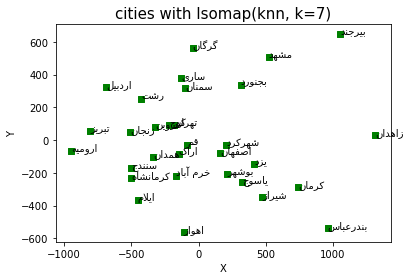

In [93]:
show_map(X_7,'Isomap',k=7)

### knn with k=12

In [94]:
distances = pd.read_excel('distances.xlsx',index_col=0)
A=distances.to_numpy()
X_12=Isomap(A,12)
X_12

array([[-153.73686926, -107.03033167],
       [-675.78079083,  313.62839413],
       [-919.24588651,   -2.38758594],
       [ 150.52885608,  -83.31931549],
       [-113.80408059, -599.85128164],
       [-465.01486869, -397.01562048],
       [ 306.58657866,  301.93731472],
       [ 981.90831899, -502.22430833],
       [ 221.20604949, -258.19683601],
       [ 902.07272596,  725.66283811],
       [-763.41366797,  104.48475986],
       [-168.05485926,  111.17946669],
       [-185.7945347 , -245.05205728],
       [-415.27741318,  228.71674311],
       [1334.20356929,   90.86654955],
       [-472.65225074,   88.79257173],
       [-143.65541512,  330.29198352],
       [-111.84620032,  273.6053503 ],
       [-505.95924916, -169.6665613 ],
       [ 191.59822876,  -40.50648545],
       [ 465.78359886, -356.49425093],
       [-287.51376597,  113.83985144],
       [ -86.24103534,  -45.94276212],
       [-194.13851011,  121.804842  ],
       [ 757.11403998, -253.63927023],
       [-502.39416557, -2

## cities with Isomap (knn,k=12)

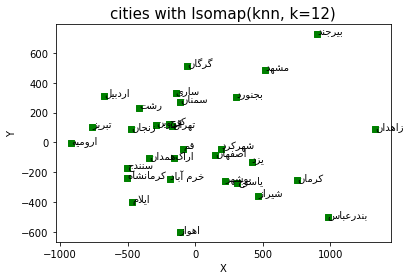

In [95]:
show_map(X_12,'Isomap',k=12)

## Isomap with function in sklearn

### knn with k=3

In [96]:
distances = pd.read_excel('distances.xlsx',index_col=0)
A=distances.to_numpy()
is3 = manifold.Isomap(n_neighbors=3,n_components=2,metric='precomputed')
is3 = is3.fit_transform(A)
is3

array([[-111.58359661,   90.22094193],
       [-808.44072394, -220.10269804],
       [-925.5738394 ,  130.56009045],
       [ 178.0204778 ,   58.47082254],
       [ -78.5924597 ,  581.82826801],
       [-503.69210008,  434.53271448],
       [ 363.90526045, -301.98798883],
       [ 992.99059475,  622.9678855 ],
       [ 241.50242799,  106.45367193],
       [1123.41349449, -593.22472221],
       [-845.18468299, -152.50162787],
       [-203.25971202, -123.97333557],
       [-227.89745362,  213.30830968],
       [-501.77574882, -201.57121883],
       [1348.11958044, -112.88373422],
       [-558.71738654,  -92.12010763],
       [-112.50772126, -504.34092322],
       [-174.42350759, -272.39017605],
       [-465.07429732,  168.39524849],
       [ 228.0337215 ,   19.59177526],
       [ 464.38630489,  370.8619553 ],
       [-357.33133412, -136.61036295],
       [-110.73767383,   -6.87504733],
       [-243.85659623, -128.50957884],
       [ 751.91925356,  292.24902481],
       [-456.66468146,  2

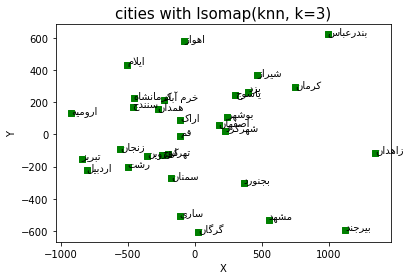

In [97]:
show_map(is3,'Isomap',k=3)

### knn with k=7

In [98]:
distances = pd.read_excel('distances.xlsx',index_col=0)
A=distances.to_numpy()
is7 = manifold.Isomap(n_neighbors=7,n_components=2,metric='precomputed')
is7 = is7.fit_transform(A)
is7

array([[-148.81387805,  -83.34766362],
       [-688.77350672,  322.55086043],
       [-949.61224299,  -63.84053503],
       [ 161.23594813,  -81.9104078 ],
       [-109.48186815, -561.07030842],
       [-452.15647513, -367.41820413],
       [ 312.47410079,  338.08086752],
       [ 959.91906594, -535.7798462 ],
       [ 213.84617791, -207.70598705],
       [1054.55927545,  646.21345213],
       [-805.42785354,   56.16277331],
       [-180.02989712,   94.70729069],
       [-171.40836669, -216.63048584],
       [-427.11818397,  252.77989644],
       [1314.11023613,   32.23685254],
       [-510.39893736,   48.35516291],
       [-130.37519936,  379.1403189 ],
       [ -99.76824708,  314.90386027],
       [-503.86489255, -169.51054596],
       [ 204.83559952,  -30.48329363],
       [ 472.19982389, -348.80161052],
       [-322.94297123,   78.01811956],
       [ -86.02532437,  -29.06926276],
       [-220.84258631,   90.95221251],
       [ 741.17935641, -288.52504709],
       [-501.43646232, -2

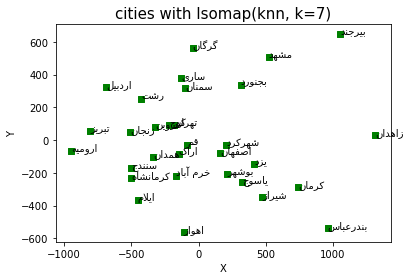

In [99]:
show_map(is7,'Isomap',k=7)

### knn with k=12

In [100]:
distances = pd.read_excel('distances.xlsx',index_col=0)
A=distances.to_numpy()
is12 = manifold.Isomap(n_neighbors=12,n_components=2,metric='precomputed')
is12 = is12.fit_transform(A)
is12

array([[-153.73686926, -107.03033167],
       [-675.78079083,  313.62839413],
       [-919.24588651,   -2.38758594],
       [ 150.52885608,  -83.31931549],
       [-113.80408059, -599.85128164],
       [-465.01486869, -397.01562048],
       [ 306.58657866,  301.93731472],
       [ 981.90831899, -502.22430833],
       [ 221.20604949, -258.19683601],
       [ 902.07272596,  725.66283811],
       [-763.41366797,  104.48475986],
       [-168.05485926,  111.17946669],
       [-185.7945347 , -245.05205728],
       [-415.27741318,  228.71674311],
       [1334.20356929,   90.86654955],
       [-472.65225074,   88.79257173],
       [-143.65541512,  330.29198352],
       [-111.84620032,  273.6053503 ],
       [-505.95924916, -169.6665613 ],
       [ 191.59822876,  -40.50648545],
       [ 465.78359886, -356.49425093],
       [-287.51376597,  113.83985144],
       [ -86.24103534,  -45.94276212],
       [-194.13851011,  121.804842  ],
       [ 757.11403998, -253.63927023],
       [-502.39416557, -2

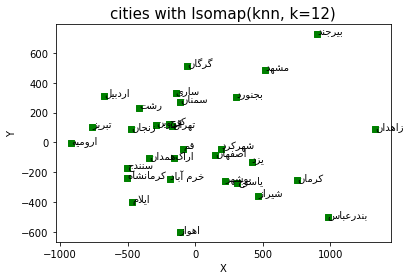

In [101]:
show_map(is12,'Isomap',k=12)